#yourNAME, yourID

# Imports

In [2]:
import librosa
import matplotlib.pyplot as plt
from scipy.io import wavfile

# Reading & Plots (2)

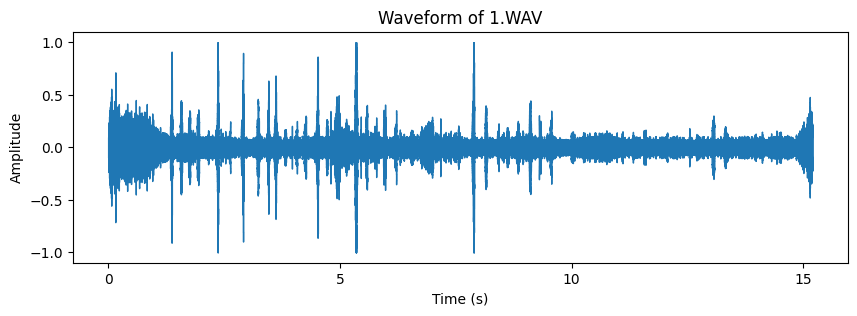

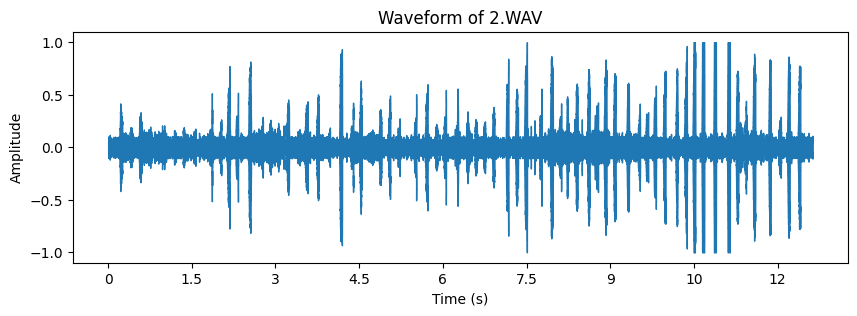

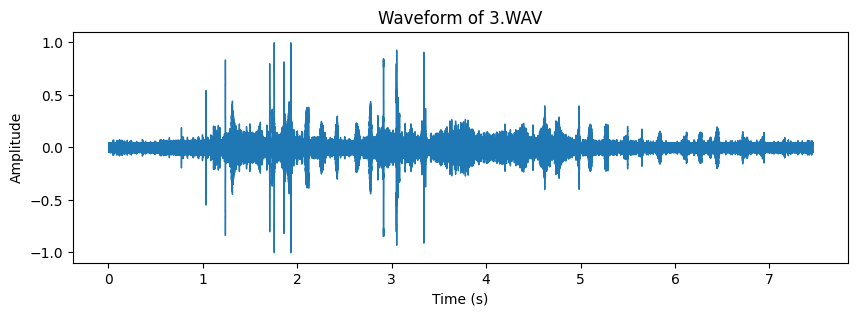

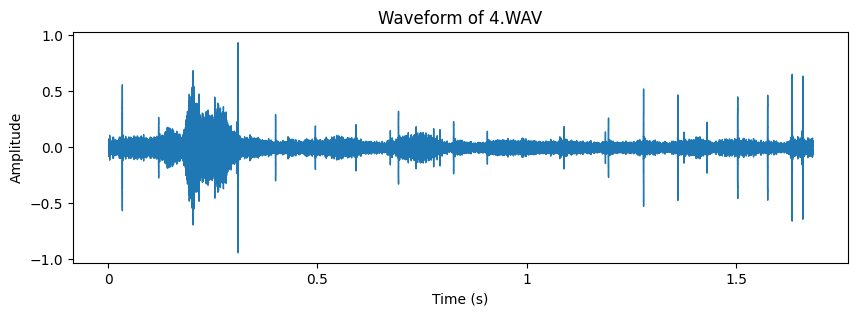

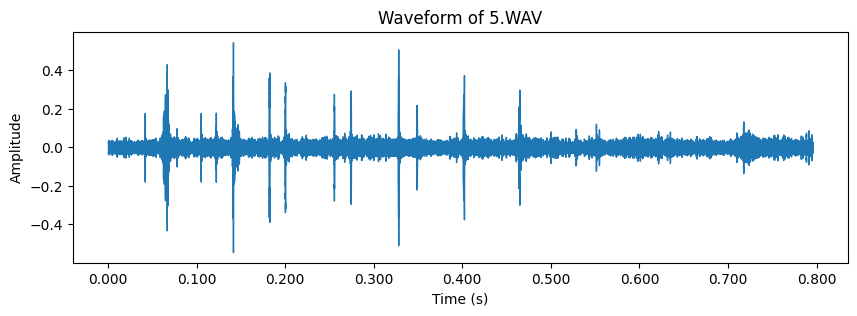

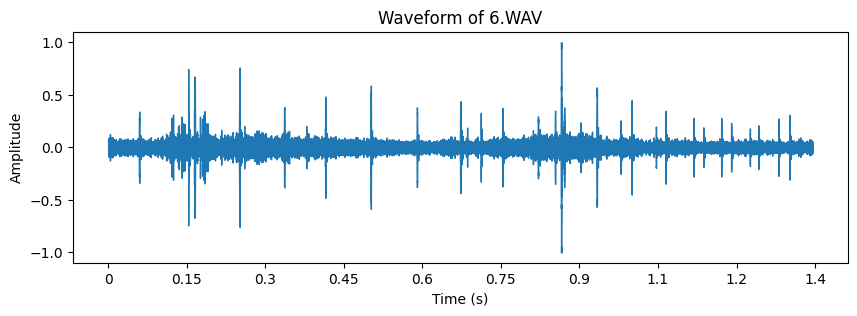

In [13]:
import os
# Read Data
data_dir = 'data'
Ys = {}
SRs = {}
for file in range(1,7):
  y, sr = librosa.load(f'{data_dir}/{file}.WAV', sr=None)
  
  Ys[file] = y
  SRs[file] = sr
  plt.figure(figsize=(10, 3))
  librosa.display.waveshow(y, sr=sr)
  plt.title(f"Waveform of {file}.WAV")
  plt.xlabel("Time (s)")
  plt.ylabel("Amplitude")
  plt.show()

- **Implement** the function to generate the **frequency spectrogram** for a given audio signal.

In [35]:
import numpy as np
import scipy
from scipy.fft import fftshift
rng = np.random.default_rng()

def compute_frequency_spectrogram(signal, sample_rate, nperseg=256, noverlap=128, plot=True):
    """
    Computes and optionally visualizes the frequency spectrogram of a given 1D signal.

    Parameters
    ----------
    signal : np.ndarray
        The input time-domain signal (1D array of samples).
    sample_rate : int or float
        Sampling rate of the signal in Hz.
    nperseg : int, optional
        Length of each segment for FFT computation (default is 256).
    noverlap : int, optional
        Number of points to overlap between segments (default is 128).
    plot : bool, optional
        If True, displays the computed spectrogram using matplotlib.

    Returns
    -------
    f : np.ndarray
        Array of sample frequencies.
    t : np.ndarray
        Array of segment times.
    Sxx : np.ndarray
        Spectrogram matrix (power or magnitude of frequency content over time).

    Notes for Students
    ------------------
    - Use `scipy.signal.spectrogram` to compute the spectrogram.
    - Convert the power spectrum to decibels using `10 * np.log10(Sxx)` for better visualization.
    - If `plot=True`, display the spectrogram with time on the x-axis and frequency on the y-axis.
    - Label axes and add a colorbar to indicate signal power.
    """
    # TODO: Compute the spectrogram using scipy.signal.spectrogram
    # f, t, Sxx = spectrogram(...)
    f, t, sxx = scipy.signal.spectrogram(signal, fs=sample_rate, nperseg=256, noverlap=128)

    # TODO: Convert Sxx to decibel scale (use np.log10)
    Sxx_db = 10 * np.log10(sxx)

    # TODO: If plot=True, visualize using plt.pcolormesh()
    if plot == True:
      plt.figure(figsize=(8, 4))
      plt.pcolormesh(t, f, Sxx_db, shading='gouraud')
      plt.title("Frequency Spectrogram")
      plt.xlabel("Time [s]")
      plt.ylabel("Frequency [Hz]")
      plt.colorbar(label="Power [dB]")
      plt.tight_layout()
      plt.show()

    return f, t, Sxx_db

**Use this function** to generate spectrograms for any **Two** provided audio files.

In [36]:
Ys.values()

dict_values([array([-0.01696777, -0.00463867,  0.01428223, ...,  0.04586792,
       -0.01269531, -0.07531738], dtype=float32), array([-0.02337646, -0.02893066, -0.04556274, ...,  0.00863647,
        0.0067749 ,  0.02612305], dtype=float32), array([ 0.01303101, -0.00799561, -0.01153564, ...,  0.01144409,
       -0.00256348, -0.01760864], dtype=float32), array([-0.01052856, -0.00894165, -0.01083374, ...,  0.04650879,
        0.04650879,  0.04403687], dtype=float32), array([-0.01495361, -0.01663208, -0.01773071, ...,  0.01965332,
        0.01824951,  0.01797485], dtype=float32), array([ 0.02481079,  0.02825928,  0.03118896, ..., -0.00314331,
       -0.00384521, -0.00466919], dtype=float32)])

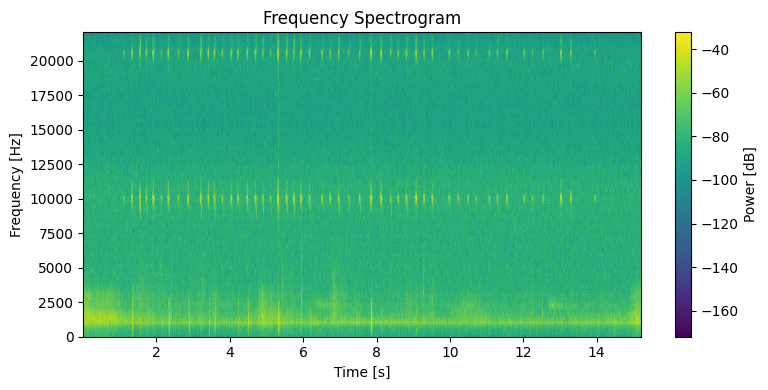

(129, 5236)


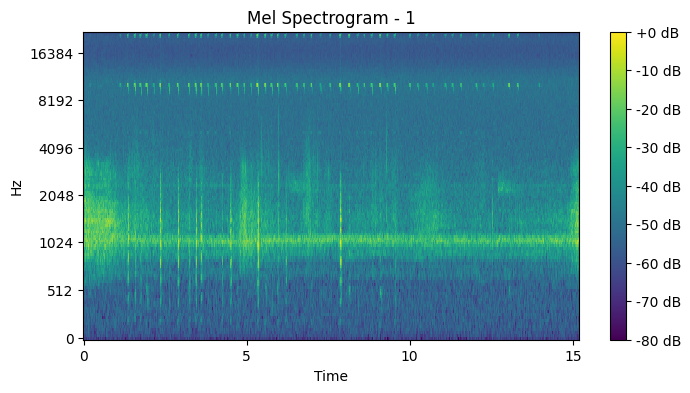

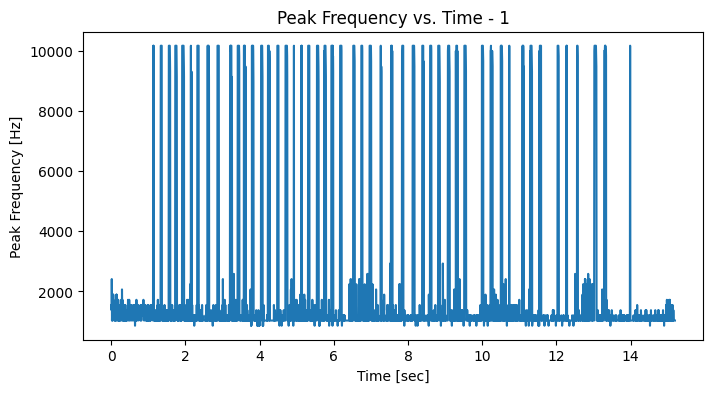

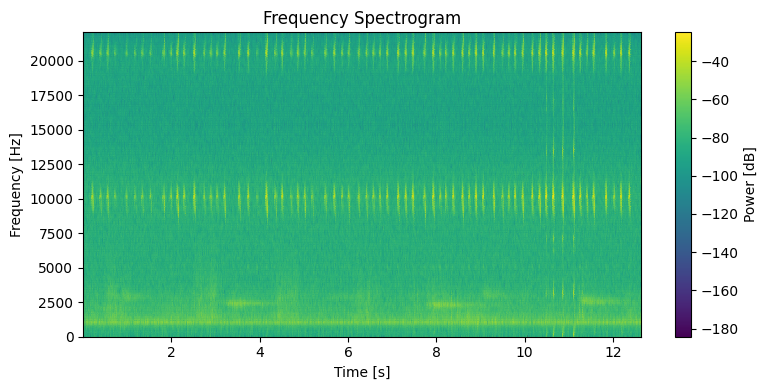

(129, 4350)


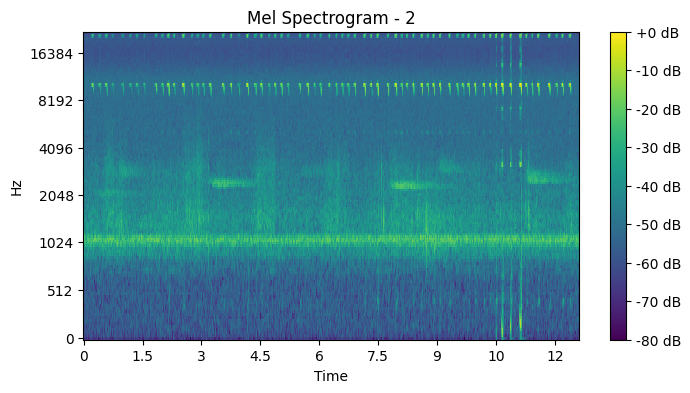

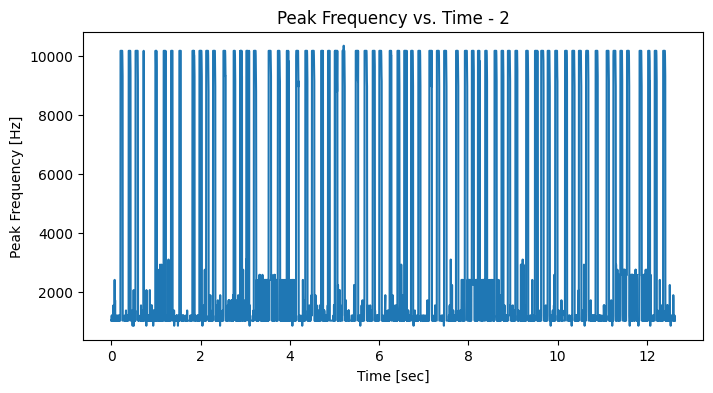

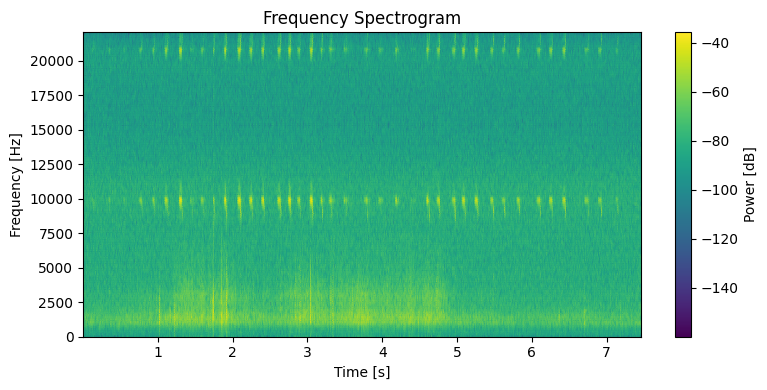

(129, 2568)


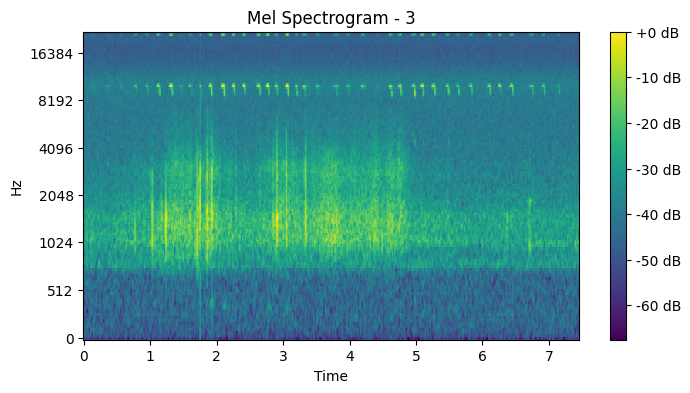

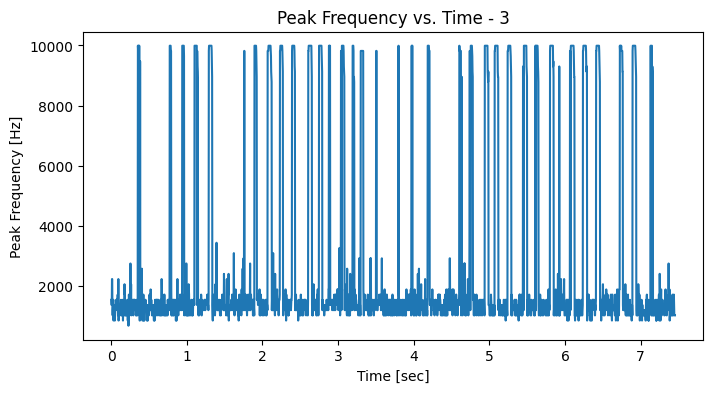

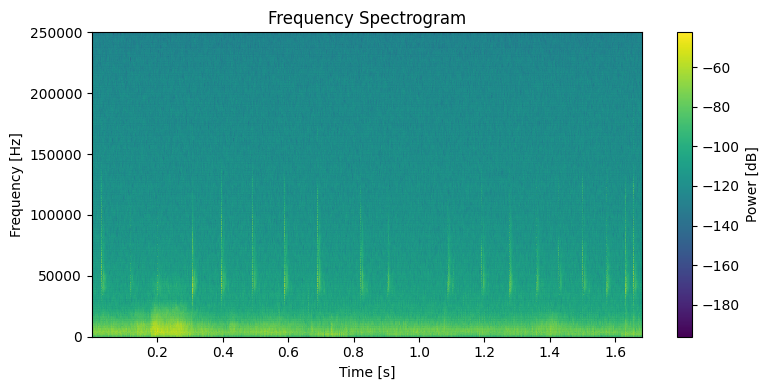

(129, 6574)


c:\Users\Hozien\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\feature\spectral.py:2148: UserWarning: Empty filters detected in mel frequency basis. Some channels will produce empty responses. Try increasing your sampling rate (and fmax) or reducing n_mels.
  mel_basis = filters.mel(sr=sr, n_fft=n_fft, **kwargs)


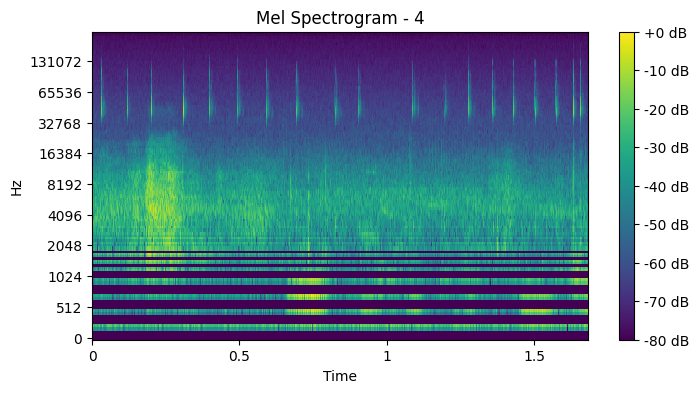

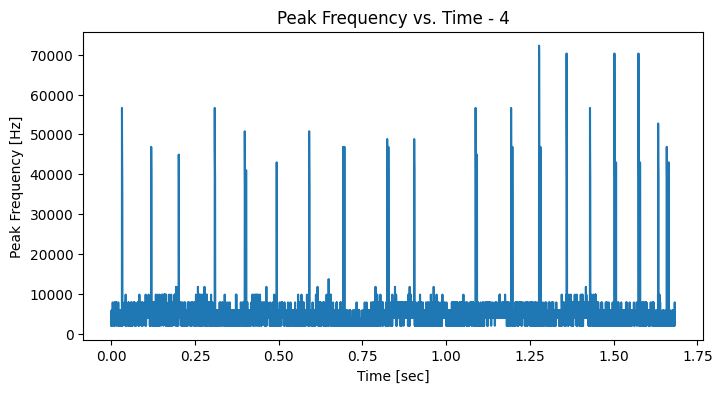

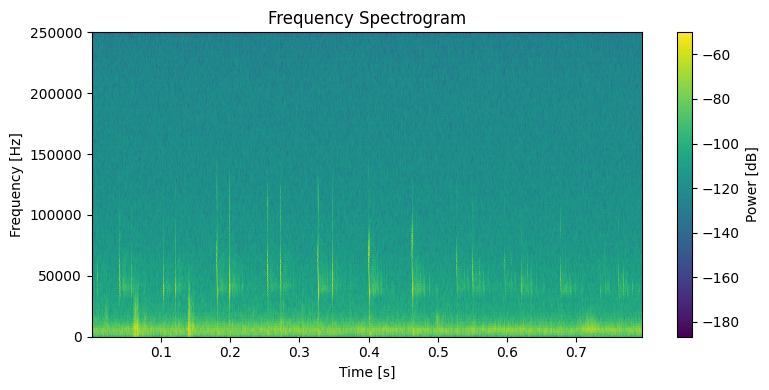

(129, 3106)


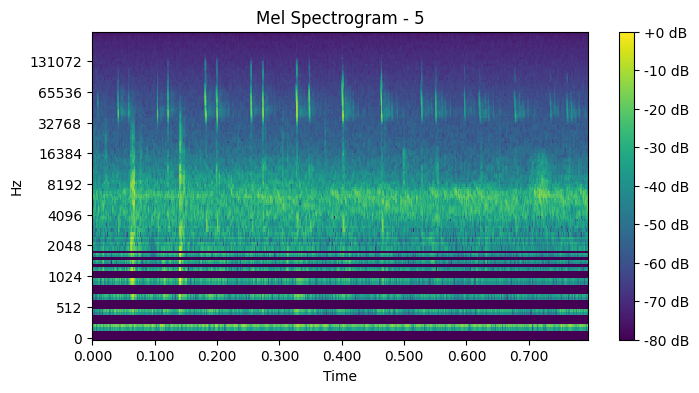

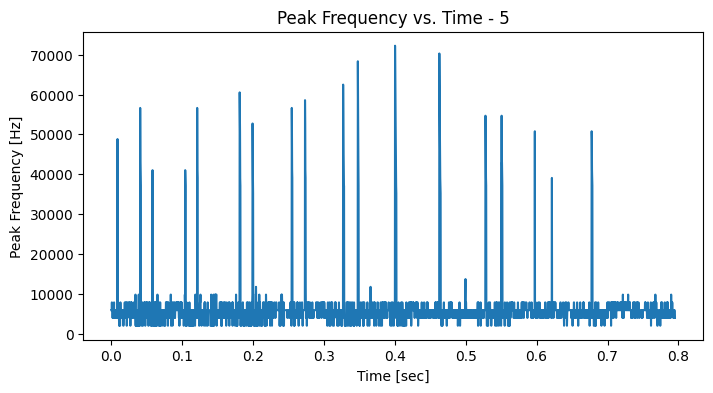

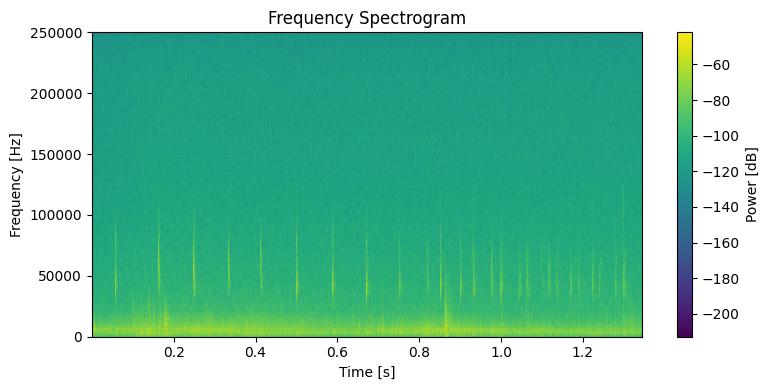

(129, 5255)


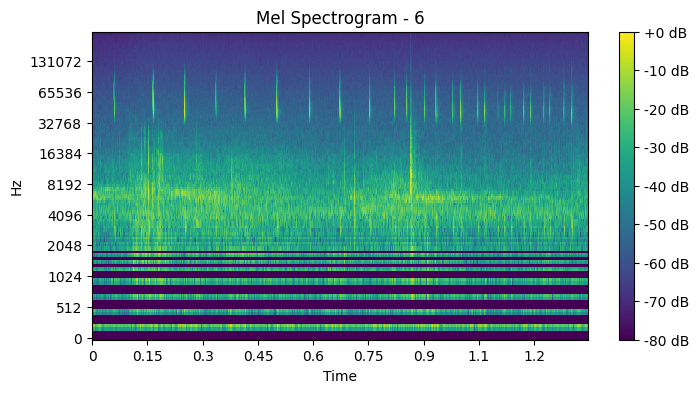

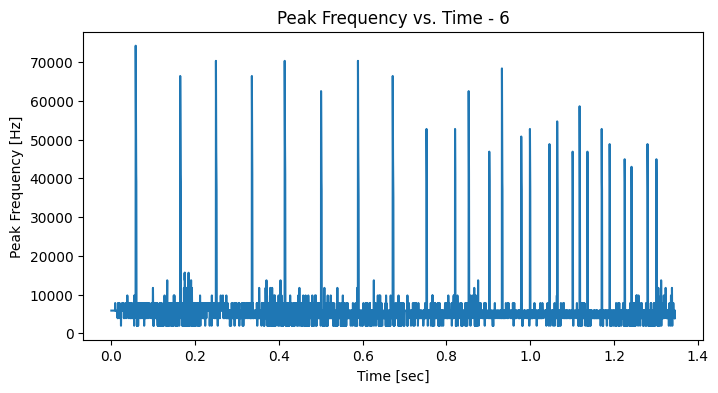

In [41]:
for i in Ys.keys():
  f, t, sxx_db = compute_frequency_spectrogram(Ys[i], SRs[i], plot=True)
  print(sxx_db.shape)
  
  # Mel Spectrogram
  mel_spec = librosa.feature.melspectrogram(y=Ys[i], sr=SRs[i], n_mels=128)
  mel_spec_db = librosa.power_to_db(mel_spec, ref=np.max)
  plt.figure(figsize=(8, 4))
  librosa.display.specshow(mel_spec_db, x_axis='time', y_axis='mel', sr=SRs[i], cmap='viridis')
  plt.colorbar(format='%+2.0f dB')
  plt.title(f'Mel Spectrogram - {i}')
  plt.show()
  
  # Frequency vs. Time (peak freq over time)
  peak_freqs = f[np.argmax(sxx_db, axis=0)]  # Peak freq per time bin
  plt.figure(figsize=(8, 4))
  plt.plot(t, peak_freqs)
  plt.ylabel('Peak Frequency [Hz]')
  plt.xlabel('Time [sec]')
  plt.title(f'Peak Frequency vs. Time - {i}')
  plt.show()

**Write a detailed comparison** explaining differences in **frequency content** between the two spectrograms, differences in **energy distribution over time and frequency**

# Species Game (3)


In [ ]:
# Write your code

Explain your logic,which features you used and why you think there's a pattern there.

# your Answer